Во второй лабораторной работе мы рассмотрим PID регуляторы. Возможно, кто-то из Вас уже с ними сталкивался и настраивал. Возможно, кто-то даже их реализовывал.

Как всегда, начнём с импортов.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Вы будет использовать PID регуляторы, чтобы управлять какой-то системой. В данном случае, какая-то система моделируется чёрным ящиком. Несмотря на то, что Вы видите его ниже, Вам не нужно в него смотреть (для реальных систем так сделать не получится).

In [2]:
class BlackBox:
  def __init__(self):
    self.a = 1.23456789
    self.b = 0.000987654321
    self.c = 0.0420
    self.d = 0.0069
    self.x = 0
    self.v = 0

  def step(self, input, dt):
    self.v += (self.a * np.clip(input, -1, 1) - np.sign(self.v) * self.b * self.v ** 2 + self.c * np.sin(self.d * self.x)) * dt
    self.x += self.v * dt

Теперь Вам нужно ознакомиться с PID регуляторами. Вот пара ссылок:

https://en.wikipedia.org/wiki/PID_controller

https://ru.wikipedia.org/wiki/%D0%9F%D0%98%D0%94-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%82%D0%BE%D1%80

In [3]:
class PID:
  def __init__(self, kp=0, ki=0, kd=0):
    self.kp = kp
    self.ki = ki
    self.kd = kd
    self.pe = 0
    self.i = 0

  def step(self, target, measured, dt):
    error = target - measured
    self.i += error * dt
    d = (error - self.pe) / dt
    self.pe = error
    output = self.kp * error + self.ki * self.i + self.kd * d
    return output


In [4]:
def experiment_v(pid):
  dt = 0.1
  size = 1000
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  target = 30
  for i in range(1, size):
    input = pid.step(target, bb.v, dt)
    bb.step(input, dt)
    v[i] = bb.v
    inputs[i] = input
  plt.plot(v)
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

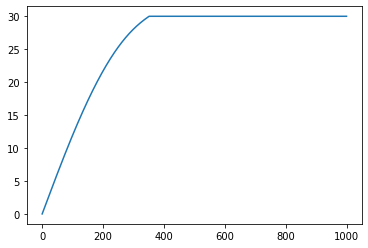

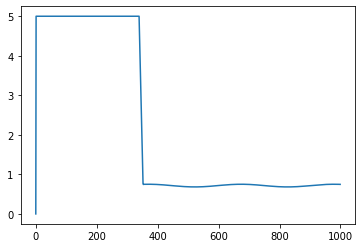

In [5]:
experiment_v(PID(10, 0, 0))

In [10]:
def experiment_x_1(pid):
  dt = 0.1
  size = 1000
  x = np.zeros(size)
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  target = 1000
  for i in range(1, size): #pid.step(target, bb.x, dt)
    target = 1000 if i % 4000 < 2000 else 0
    input = pid.step(target, bb.x, dt)
    bb.step(input, dt)
    x[i] = bb.x
    v[i] = bb.v
    inputs[i] = input
  plt.plot(x)
  plt.show()
  plt.plot(v)
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

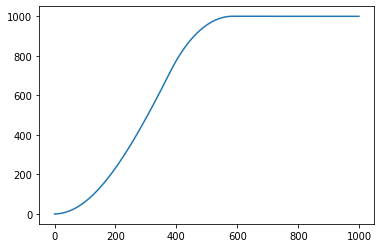

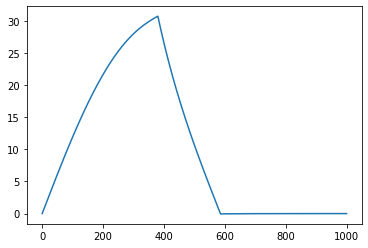

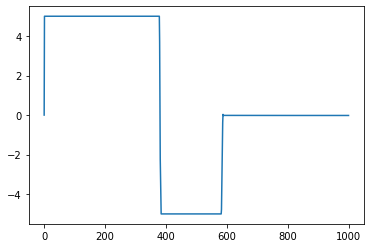

In [16]:
experiment_x_1(PID(1, 0, 9.2))

In [17]:
def experiment_x_2(pid):
  dt = 0.1
  size = 10000
  x = np.zeros(size)
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  for i in range(1, size):
    target = 1000 if i % 4000 < 2000 else 0
    input = pid.step(target, bb.x, dt)
    bb.step(input, dt)
    x[i] = bb.x
    v[i] = bb.v
    inputs[i] = input
  plt.plot(x)
  plt.show()
  plt.plot(v)
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

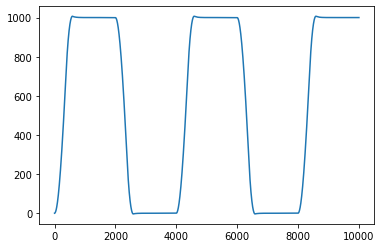

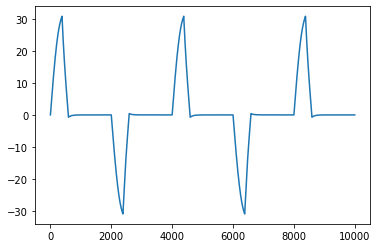

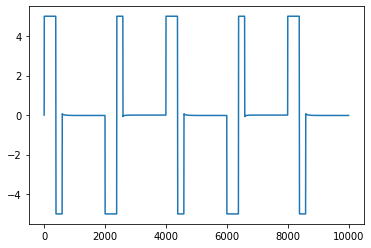

In [21]:
experiment_x_2(PID(1, 0, 9))

Для этой работы сдача в автоматическом режиме пока не предусмотрена. Поэтому, Вам нужно будет показать в Discord Ваше решение.

Задание 2b заключается в том, чтобы составить свой (не менее интересный) чёрный ящик и настроить PID.